# Testing Neural Network

In [103]:
# importing libraries

from neural_network import *
import matplotlib.pyplot as plt

### Initializing Scatater Plot Data

[]

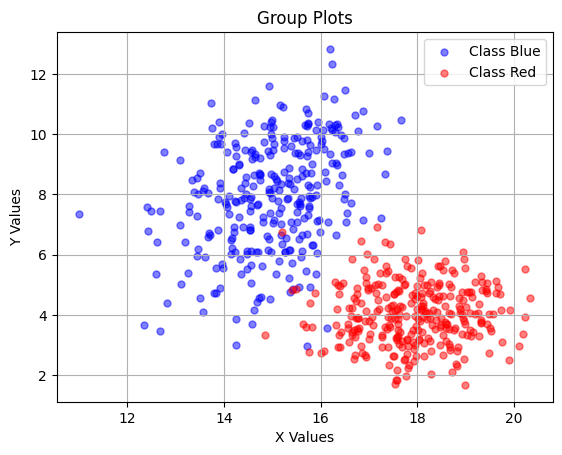

In [104]:
mean_1 = [15, 8]
covariance_1 = [
    [1, 0.5],
    [0.5, 3]
]

mean_2 = [18, 4]
covariance_2 = [
    [1, 0],
    [0, 1]
]

num_points = 300

# generating data
data_1 = np.random.multivariate_normal(mean_1, covariance_1, num_points)
data_2 = np.random.multivariate_normal(mean_2, covariance_2, num_points)

# separate x and y
x_1 = data_1[:, 0]
y_1 = data_1[:, 1]

x_2 = data_2[:, 0]
y_2 = data_2[:, 1]

# creating scatter plot
plt.scatter(x_1, y_1, alpha=0.5, s=25, color='blue', label='Class Blue')
plt.scatter(x_2, y_2, alpha=0.5, s=25, color='red', label='Class Red')

plt.title('Group Plots')
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.grid(True)
plt.legend(loc='upper right')

plt.plot()

### Data Prep

In [105]:
# combining x & y values
combined_1 = [[x_1[i], y_1[i]] for i in range(len(x_1))]
combined_2 = [[x_2[i], y_2[i]] for i in range(len(x_2))]

# creating our data set for our neural network
inputs = []
actual_values = []

for i in range(len(combined_1)):
    # adding data from group Blue
    inputs.append(combined_1[i])
    actual_values.append([[1]])
for i in range(len(combined_2)):
    # adding data from group Red
    inputs.append(combined_2[i])
    actual_values.append([[0]])



# for i in range(10):
#     print(f'{inputs[i]} ==> {actual_values[i]}')
# print('='*80)
# for i in range(295, 305):
#     print(f'{inputs[i]} ==> {actual_values[i]}')
# print('='*80)
# for i in range(400, 410):
#     print(f'{inputs[i]} ==> {actual_values[i]}')

### Training Neural Network

In [106]:
alpha = 0.1
epochs = 200
regularization = 'L2'
lambda_const = 0.15

# training neural network with regularization
nn1 = Neural_Network(
    input_layer_num_nodes=2,
    hidden_layer_dimensions=[8],
    output_layer_dimensions=[1],
    alias='nn1',
    activation_functions=[relu, sigmoid],
    weight_normalizations=[he_normal, xavier_normal]
)

nn1.multi_run_learn_data(
    input_list=inputs, 
    expected_list=actual_values, 
    learning_rate=alpha, 
    epochs=epochs,
    regularization=regularization,
    lambda_const=lambda_const
)

# training neural network without regularization
nn2 = Neural_Network(
    input_layer_num_nodes=2,
    hidden_layer_dimensions=[8],
    output_layer_dimensions=[1],
    alias='nn2',
    activation_functions=[relu, sigmoid],
    weight_normalizations=[he_normal, xavier_normal]
)

nn2.multi_run_learn_data(
    input_list=inputs,
    expected_list=actual_values,
    learning_rate=alpha,
    epochs=epochs
)

In [107]:
# classifying each data point into either group Blue (1) or Red (0)
predict_values_1 = []
predict_values_2 = []

# making predictions for neural network with and without regularization
for i in range(len(inputs)):
    predict_value_1 = nn1.get_output(inputs[i])
    predict_value_2 = nn2.get_output(inputs[i])

    # collapsing float to a binary output
    if predict_value_1[0] < 0.5:
        predict_value_1[0] = 0
    else:
        predict_value_1[0] = 1

    predict_values_1.append([predict_value_1])

    if predict_value_2[0] < 0.5:
        predict_value_2[0] = 0
    else:
        predict_value_2[0] = 1

    predict_values_2.append([predict_value_2])



# for i in range(10):
#     print(f'{inputs[i]} ==> predict {predict_values_1[i][0]} vs actual {actual_values[i][0]}')
# print('='*80)
# for i in range(295, 305):
#     print(f'{inputs[i]} ==> predict {predict_values_1[i][0]} vs actual {actual_values[i][0]}')
# print('='*80)
# for i in range(400, 410):
#     print(f'{inputs[i]} ==> predict {predict_values_1[i][0]} vs actual {actual_values[i][0]}')

### Evaluating Neural Network Training

In [108]:
correct_x_coord_1 = []
correct_y_coord_1 = []

incorrect_x_coord_1 = []
incorrect_y_coord_1 = []

# comparing predict vs actual and putting into the corresponding bucket
for i in range(len(predict_values_1)):
    if predict_values_1[i][0] == actual_values[i][0]:
        # correct classification
        correct_x_coord_1.append(inputs[i][0])
        correct_y_coord_1.append(inputs[i][1])
    else:
        # incorrect classification
        incorrect_x_coord_1.append(inputs[i][0])
        incorrect_y_coord_1.append(inputs[i][1])



# doing the same for the neural network without regularization
correct_x_coord_2 = []
correct_y_coord_2 = []

incorrect_x_coord_2 = []
incorrect_y_coord_2 = []

for i in range(len(predict_values_2)):
    if predict_values_2[i][0] == actual_values[i][0]:
        # correct classification
        correct_x_coord_2.append(inputs[i][0])
        correct_y_coord_2.append(inputs[i][1])
    else:
        # incorrect classification
        incorrect_x_coord_2.append(inputs[i][0])
        incorrect_y_coord_2.append(inputs[i][1])

In [109]:
print('Accuracy for neural network with regularization')
print(f'Num Correct: {len(correct_x_coord_1)} [{100*len(correct_x_coord_1) / (2*num_points)}%]')
print(f'Num Incorrect: {len(incorrect_x_coord_1)} [{100*len(incorrect_x_coord_1) / (2*num_points)}%]')
print('\n')

print('Accuracy for neural network without regularization')
print(f'Num Correct: {len(correct_x_coord_2)} [{100*len(correct_x_coord_2) / (2*num_points)}%]')
print(f'Num Incorrect: {len(incorrect_x_coord_2)} [{100*len(incorrect_x_coord_2) / (2*num_points)}%]')

Accuracy for neural network with regularization
Num Correct: 569 [94.83333333333333%]
Num Incorrect: 31 [5.166666666666667%]


Accuracy for neural network without regularization
Num Correct: 300 [50.0%]
Num Incorrect: 300 [50.0%]


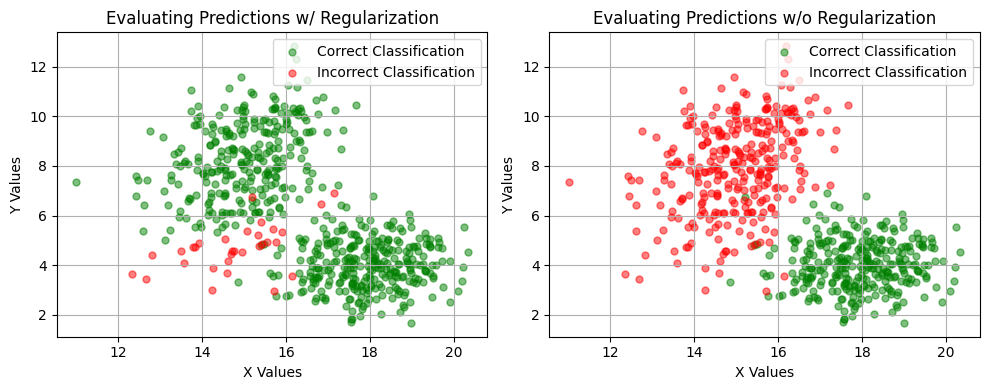

In [110]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# With Regularization
ax1.scatter(correct_x_coord_1, correct_y_coord_1, alpha=0.5, s=25, color='green', label='Correct Classification')
ax1.scatter(incorrect_x_coord_1, incorrect_y_coord_1, alpha=0.5, s=25, color='red', label='Incorrect Classification')

ax1.set_title('Evaluating Predictions w/ Regularization')
ax1.set_xlabel('X Values')
ax1.set_ylabel('Y Values')
ax1.grid(True)
ax1.legend(loc='upper right')

# Without Regularization
ax2.scatter(correct_x_coord_2, correct_y_coord_2, alpha=0.5, s=25, color='green', label='Correct Classification')
ax2.scatter(incorrect_x_coord_2, incorrect_y_coord_2, alpha=0.5, s=25, color='red', label='Incorrect Classification')

ax2.set_title('Evaluating Predictions w/o Regularization')
ax2.set_xlabel('X Values')
ax2.set_ylabel('Y Values')
ax2.grid(True)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [111]:
print('Regularization Weights')
print(nn1.hidden_layers[0].get_weights_matrix())
print(nn1.output_layers[0].get_weights_matrix())
print('\n')

print('No Regularization Weights')
print(nn2.hidden_layers[0].get_weights_matrix())
print(nn2.output_layers[0].get_weights_matrix())

Regularization Weights
[[-2.32218697e-03 -2.85422546e-03]
 [-5.22802164e-04 -1.18004499e-03]
 [-1.42982821e-04 -3.83021885e-03]
 [-3.45508876e-03  9.06982659e-04]
 [ 2.11890691e-01 -3.05684471e-01]
 [-3.24624916e-03 -3.78440591e-03]
 [-5.69286965e-02  3.59035455e-01]
 [-1.72210718e-03 -2.04300757e-03]]
[[-0.00039802  0.00224408  0.00178058 -0.00169553 -0.37205712  0.0018464
   0.36422268  0.00163788]]


No Regularization Weights
[[-1.01755951 -0.70767104]
 [-1.55627295  1.17834804]
 [ 0.47340388  0.90683043]
 [ 0.36952974  0.01259644]
 [ 0.81356457  1.45057311]
 [-0.8188645   1.61183253]
 [ 1.2300892  -1.6156552 ]
 [-0.53472504  0.30309976]]
[[ 0.11918439 -0.83099243 -1.54439808  0.34870999 -0.3943534   0.21197533
   0.50190193  0.16945758]]
